#Task 01

In [ ]:
!pip install pandas

In [ ]:
# Check versions of the libraries
try:
    import numpy
    print(f"NumPy is installed. Version: {numpy.__version__}")
except ImportError:
    print("NumPy is NOT installed.")

try:
    import scipy
    print(f"SciPy is installed. Version: {scipy.__version__}")
except ImportError:
    print("SciPy is NOT installed.")

try:
    import sklearn
    print(f"Scikit-Learn is installed. Version: {sklearn.__version__}")
except ImportError:
    print("Scikit-Learn is NOT installed.")


NumPy is installed. Version: 1.26.4
SciPy is installed. Version: 1.13.1
Scikit-Learn is installed. Version: 1.6.0


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/content/IMDB Dataset.csv")

# Display the first few rows of the DataFrame
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
print(f"The number of reviews we have is {df.shape[0]}")


The number of reviews we have is 50000


In [ ]:
df['review'] = df['review'].str.replace('<br /><br />', '', regex=False)


In [ ]:
print(df.head(20))

                                               review sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. The filming tec...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
5   Probably my all-time favorite movie, a story o...  positive
6   I sure would like to see a resurrection of a u...  positive
7   This show was an amazing, fresh & innovative i...  negative
8   Encouraged by the positive comments about this...  negative
9   If you like original gut wrenching laughter yo...  positive
10  Phil the Alien is one of those quirky films wh...  negative
11  I saw this movie when I was about 12 when it c...  negative
12  So im not a big fan of Boll's work but then ag...  negative
13  The cast played Shakespeare.Shakespeare lost.I...  negative
14  This a fantastic movie of three pris

In [ ]:
with open('ass2.txt', 'w', encoding='utf-8') as file:
    for review in df['review']:
        file.write(review + '\n')  #


In [ ]:
df['sentiment_label'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Read the text file
with open('ass2.txt', 'r') as file:
    lines = file.readlines()

# Step 2: Initialize CountVectorizer
vectorizer = CountVectorizer()

# Step 3: Fit and Transform the text data
X = vectorizer.fit_transform(lines)

# Step 4: Display the results
# Vocabulary
print("Vocabulary:", vectorizer.get_feature_names_out())

# Sparse Matrix
print("Sparse Matrix Shape:", X.shape)



Vocabulary: ['00' '000' '00000000000' ... 'żmijewski' 'יגאל' 'כרמון']
Sparse Matrix Shape: (50000, 104089)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming `sparse_matrix` is your sparse feature matrix (X) and `labels` is the target (y)
x= X
y = df['sentiment_label']  # Replace with your actual target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a logistic regression model (supports sparse input)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred_model_1 = model.predict(X_test)
report_1= classification_report(y_test, y_pred_model_1)
# Evaluate the model
print(report_1)


              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4961
           1       0.89      0.89      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_model_2 = nb_model.predict(X_test)
report_2= classification_report(y_test, y_pred_model_2)
# Evaluate the model using classification report
print(report_2)


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4961
           1       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



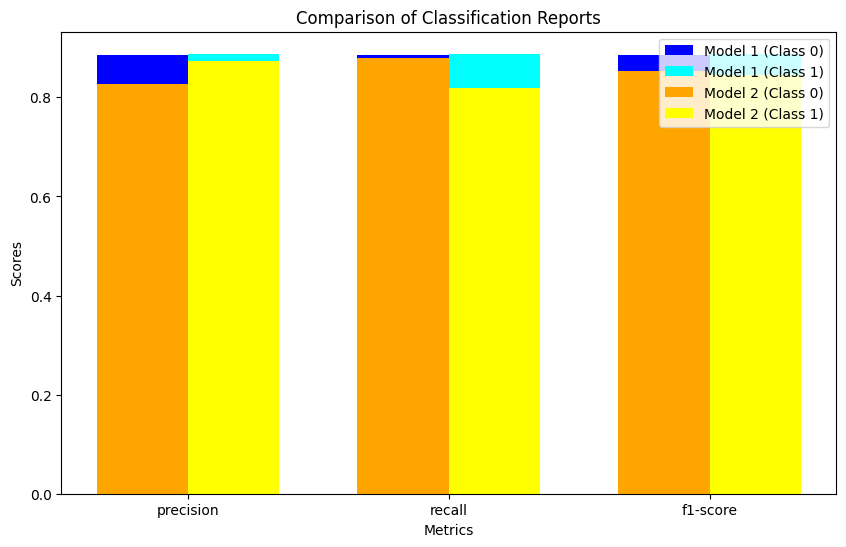

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Example classification reports from two models (replace with your actual reports)
report_1 = classification_report(y_test, y_pred_model_1, output_dict=True)
report_2 = classification_report(y_test, y_pred_model_2, output_dict=True)

# Extract precision, recall, and f1-score for class 0 and class 1
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']

# Prepare data for plotting by extracting precision, recall, and f1-score for each class
model_1_metrics = {
    '0': [report_1['0'][metric] for metric in metrics],
    '1': [report_1['1'][metric] for metric in metrics]
}

model_2_metrics = {
    '0': [report_2['0'][metric] for metric in metrics],
    '1': [report_2['1'][metric] for metric in metrics]
}

# Create an index for the x-axis (metrics: precision, recall, f1-score)
x = np.arange(len(metrics))  # Positions of the bars
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for both models
rects1 = ax.bar(x - width/2, model_1_metrics['0'], width, label='Model 1 (Class 0)', color='blue')
rects2 = ax.bar(x + width/2, model_1_metrics['1'], width, label='Model 1 (Class 1)', color='cyan')
rects3 = ax.bar(x - width/2, model_2_metrics['0'], width, label='Model 2 (Class 0)', color='orange')
rects4 = ax.bar(x + width/2, model_2_metrics['1'], width, label='Model 2 (Class 1)', color='yellow')

# Labeling the axes
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Reports')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Show plot
plt.show()


Model 1 belongs to Logistic Regression.
We can see fro the chart that for both classes the precision of Model 1 that is model 1 has greater precision, recall and f1-score than model 2. So logistics Regression model is better than Naive Bayes model.


# Task 2

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Read the text file
with open('ass2.txt', 'r') as file:
    lines = file.readlines()

# Step 2: Initialize CountVectorizer
vectorizer = TfidfVectorizer()

# Step 3: Fit and Transform the text data
X = vectorizer.fit_transform(lines)

# Step 4: Display the results
# Vocabulary
print("Vocabulary:", vectorizer.get_feature_names_out())

# Sparse Matrix
print("Sparse Matrix Shape:", X.shape)



Vocabulary: ['00' '000' '00000000000' ... 'żmijewski' 'יגאל' 'כרמון']
Sparse Matrix Shape: (50000, 104089)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming `sparse_matrix` is your sparse feature matrix (X) and `labels` is the target (y)
x= X
y = df['sentiment_label']  # Replace with your actual target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a logistic regression model (supports sparse input)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred_model_3 = model.predict(X_test)
report_3= classification_report(y_test, y_pred_model_3)
# Evaluate the model
print(report_3)


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_model_4 = nb_model.predict(X_test)
report_4= classification_report(y_test, y_pred_model_4)
# Evaluate the model using classification report
print(report_4)


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4961
           1       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



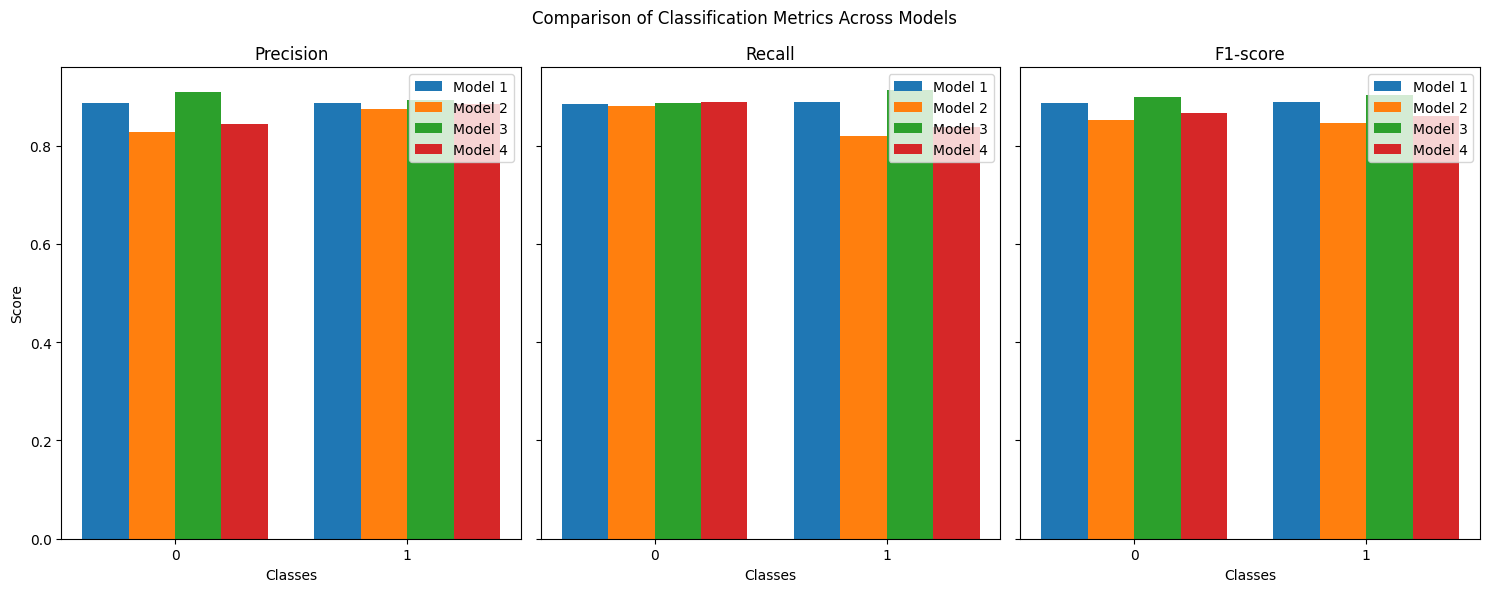

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Example classification reports (replace with your actual data)
# Replace `y_test` and `y_pred_model_*` with your actual test labels and predictions
report_1 = classification_report(y_test, y_pred_model_1, output_dict=True)
report_2 = classification_report(y_test, y_pred_model_2, output_dict=True)
report_3 = classification_report(y_test, y_pred_model_3, output_dict=True)
report_4 = classification_report(y_test, y_pred_model_4, output_dict=True)

# Metrics and classes to plot
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']

# Extract data for all models
model_reports = {
    "Model 1": report_1,
    "Model 2": report_2,
    "Model 3": report_3,
    "Model 4": report_4
}

# Prepare data for plotting
plot_data = {metric: {cls: [] for cls in classes} for metric in metrics}

for model_name, report in model_reports.items():
    for metric in metrics:
        for cls in classes:
            plot_data[metric][cls].append(report[cls][metric])

# Plot grouped bar charts for each metric
# Create a new x-axis index for each class
x = np.arange(len(classes))  # Positions for classes (0 and 1)
width = 0.2  # Bar width

fig, axes = plt.subplots(1, len(metrics), figsize=(15, 6), sharey=True)

for i, metric in enumerate(metrics):
    ax = axes[i]
    for j, model_name in enumerate(model_reports.keys()):
        # Extract data for the current metric and model
        data = [plot_data[metric][cls][j] for cls in classes]  # Data for class 0 and class 1
        ax.bar(x + (j - 1.5) * width, data, width, label=model_name)

    ax.set_title(f'{metric.capitalize()}')
    ax.set_xlabel('Classes')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.legend()

axes[0].set_ylabel('Score')
plt.suptitle('Comparison of Classification Metrics Across Models')
plt.tight_layout()
plt.show()



Model 1 and Model 2 belong to Logistic Regression and Naive Bayes models of Bag of words. Model 3 and Model 4 belong Logistics Regression and Naive Bayes model of TF-IDF. We can from the charts that regression model in both bag of words and TF-IDf performed better than Naive Bayes.

Although TF-IDF performed sligtliy better than BOW, there is no significant difference in the models of TF-IDF and BOW.

In my experiment both bag of words and TF-IDF are almost same with TF-IDF having a slight upperhand.

# Task 3

We can see from the chart that for both classes the precision of Model 1 that is

In [ ]:
!pip install tensorflow


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6097 - loss: 0.6652 - val_accuracy: 0.7279 - val_loss: 0.5645
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7412 - loss: 0.5484 - val_accuracy: 0.7558 - val_loss: 0.5180
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7609 - loss: 0.5136 - val_accuracy: 0.7645 - val_loss: 0.5017
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7721 - loss: 0.4948 - val_accuracy: 0.7699 - val_loss: 0.4928
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7732 - loss: 0.4900 - val_accuracy: 0.7761 - val_loss: 0.4874
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7794 - loss: 0.4838 - val_accuracy: 0.7764 - val_loss: 0.4838
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7781 - loss: 0.4788 - val_accuracy: 0.7712 - val_loss: 0.4861
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7795 - loss: 0.4798 - 

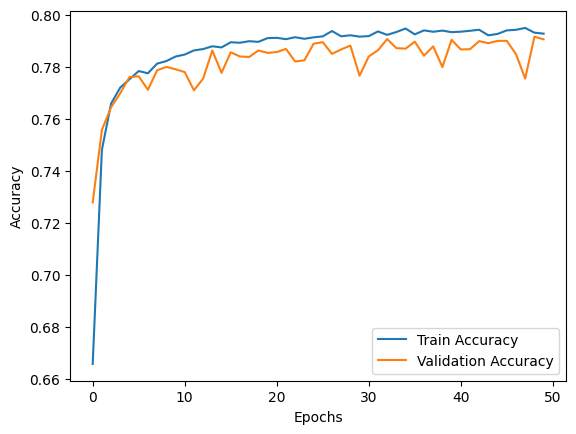

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from sklearn.model_selection import train_test_split

# Step 1: Load and preprocess the dataset
df = pd.read_csv("/content/IMDB Dataset.csv")  # Replace with your dataset path
texts = df['review'].values
labels = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

# Tokenize and pad sequences
tokenizer = Tokenizer()  # Use top 20k words
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
data = pad_sequences(sequences, maxlen=200)  # Pad sequences to length 200

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Step 2: Load GloVe embeddings
embedding_index = {}
with open("/content/glove.6B.100d.txt", encoding="utf-8") as f:  # Replace with your path to GloVe
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if i < len(word_index) + 1:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Step 3: Define the model
from tensorflow.keras.layers import GlobalAveragePooling1D

# Step 3: Define the model
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    embedding_dim,
                    weights=[embedding_matrix],
                    input_length=200,
                    trainable=False))
model.add(GlobalAveragePooling1D())  # Reduces (batch_size, sequence_length, embedding_dim) -> (batch_size, embedding_dim)
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Visualize training progress
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


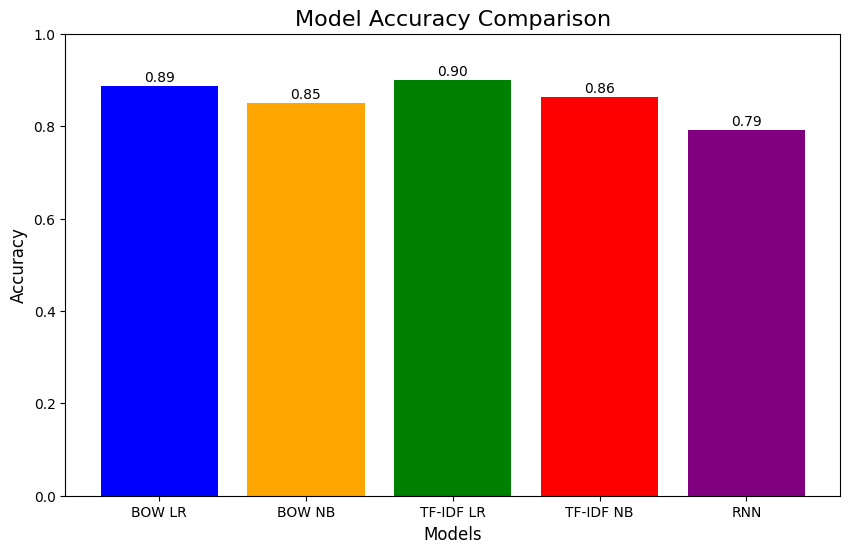

Accuracy: 0.79


In [ ]:
import matplotlib.pyplot as plt

# Example data: Replace with your actual model names and accuracy values
accuracy1 = report_1['accuracy']
accuracy2 = report_2['accuracy']
accuracy3 = report_3['accuracy']
accuracy4 = report_4['accuracy']

model_names = ['BOW LR', 'BOW NB', 'TF-IDF LR', 'TF-IDF NB', 'RNN']
accuracies = [accuracy1,accuracy2,accuracy3, accuracy4, 0.7906]  # Replace with your accuracy values

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)  # Set the y-axis to range from 0 to 1 for accuracy

# Annotate bars with accuracy values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', fontsize=10)

# Show the plot
plt.show()


# print(f"Accuracy: {accuracy:.2f}")

We can see from our experiment than RNN does not do a better job than Logistic Regressiona and Naive Bayes. In fact, RNN performs worst among all the other models. Maybe we need to increase the hidden layers of the RNN model so that it learns better. We have to make the RNN more complex.